In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 1000
%matplotlib inline

In [2]:
df = pd.read_csv('./Data Analysis/Data_EDA.csv')
df_2 = pd.read_csv('./train_test_result/train.csv')

In [3]:
df.head()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Num_of_Borrowers,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Male,No,0,Graduate,No,5849,0.0,1,149.297043,360.0,1.0,Urban,Y
1,1,Male,Yes,1,Graduate,No,4583,1508.0,2,128.000000,360.0,1.0,Rural,N
2,2,Male,Yes,0,Graduate,Yes,3000,0.0,1,66.000000,360.0,1.0,Urban,Y
3,3,Male,Yes,0,Not Graduate,No,2583,2358.0,2,120.000000,360.0,1.0,Urban,Y
4,4,Male,No,0,Graduate,No,6000,0.0,1,141.000000,360.0,1.0,Urban,Y


In [4]:
df.drop(['Unnamed: 0', 'Loan_Status'], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
Gender               981 non-null object
Married              981 non-null object
Dependents           981 non-null object
Education            981 non-null object
Self_Employed        981 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Num_of_Borrowers     981 non-null int64
LoanAmount           981 non-null float64
Loan_Amount_Term     981 non-null float64
Credit_History       981 non-null float64
Property_Area        981 non-null object
dtypes: float64(4), int64(2), object(6)
memory usage: 92.0+ KB


In [7]:
df.iloc[:, [0,1,2,3,4,10,11]] = df.iloc[:, [0,1,2,3,4,10,11]].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
Gender               981 non-null category
Married              981 non-null category
Dependents           981 non-null category
Education            981 non-null category
Self_Employed        981 non-null category
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Num_of_Borrowers     981 non-null int64
LoanAmount           981 non-null float64
Loan_Amount_Term     981 non-null float64
Credit_History       981 non-null category
Property_Area        981 non-null category
dtypes: category(7), float64(3), int64(2)
memory usage: 45.9 KB


In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,Num_of_Borrowers,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,981.000000,981.000000,981.000000
mean,5179.795107,1601.916330,1.562691,142.446906,337.488277
std,5695.104533,2718.772806,0.496307,76.384477,73.236848
min,0.000000,0.000000,1.000000,9.000000,6.000000
25%,2875.000000,0.000000,1.000000,101.000000,360.000000
50%,3800.000000,1110.000000,2.000000,128.000000,360.000000
75%,5516.000000,2365.000000,2.000000,160.000000,360.000000
max,81000.000000,41667.000000,2.000000,700.000000,480.000000


Text(0.5, 1.0, 'Number of Educated/Not Educated Males/Females Borrowers')

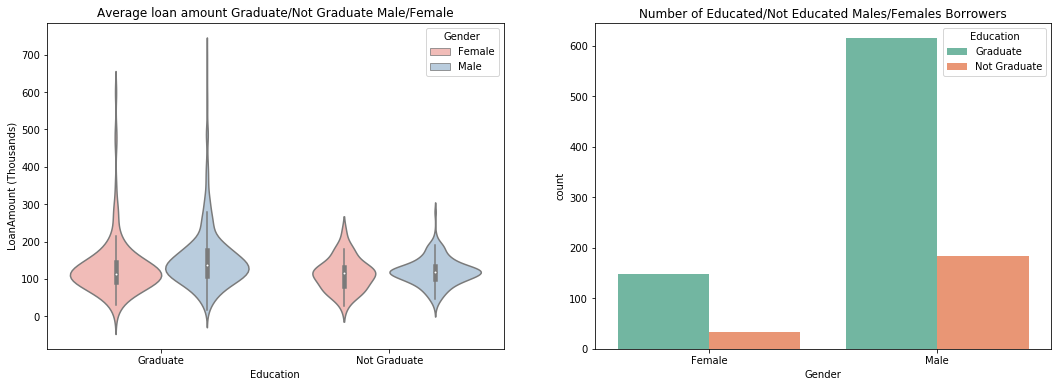

In [10]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18,6)

vp = sns.violinplot(x='Education', y='LoanAmount', data=df, hue='Gender', palette="Pastel1", ax=ax[0])
vp.set_ylabel('LoanAmount (Thousands)')
vp.set_title('Average loan amount Graduate/Not Graduate Male/Female')

cp2 = sns.countplot(x='Gender', hue='Education', data=df, palette='Set2', ax=ax[1])
cp2.set_title('Number of Educated/Not Educated Males/Females Borrowers')

### Graduated Women have a higher probability of borrowing a loan between 100-150 thousand dollars than Men. This might be because male graduates tend to get a higher paying job than female graduates. On the other hand, males that did not graduate yet/have no education have higher probability to take a loan. The reason for this is not clear enough but it might be because jobs that do not require education pay higher wages to females.

### The ratio between the number of Educated Females and Educated Males is 1/4 (for every 4 male graduates there is 1 female graduate). 

Text(0.5, 1.0, 'Number of Married/Not Married Males/Females Borrowers')

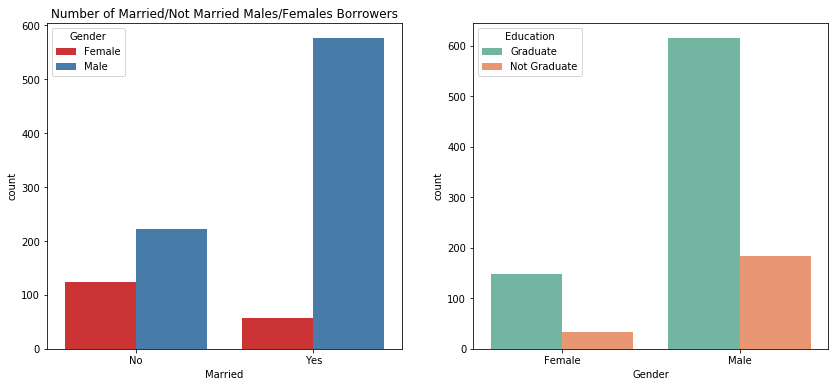

In [11]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(14,6)

cp = sns.countplot(x='Married', hue='Gender', data=df, palette='Set1', ax=ax[0])
cp.set_title('Number of Married/Not Married Males/Females Borrowers')

cp2 = sns.countplot(x='Gender', hue='Education', data=df, palette='Set2', ax=ax[1])
cp.set_title('Number of Married/Not Married Males/Females Borrowers')

Text(0.5, 1.0, 'Average LoanAmount for Married/Not Married borrowers')

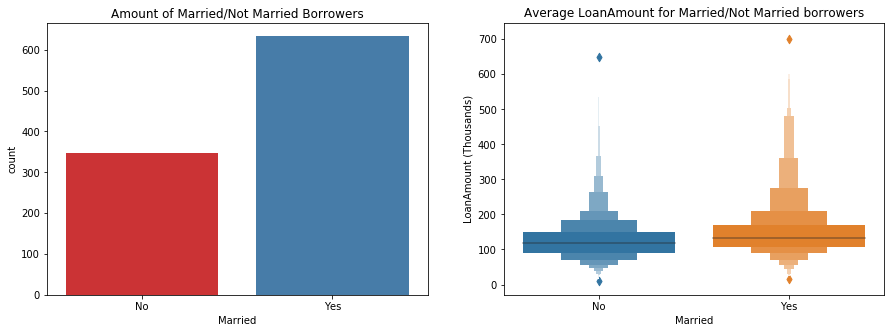

In [12]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15,5)

cp2 = sns.countplot(x='Married', data=df, palette="Set1", ax=ax[0])
cp2.set_title('Amount of Married/Not Married Borrowers')

bp = sns.boxenplot(x=df["Married"], y=df["LoanAmount"], ax=ax[1])
bp.set_ylabel('LoanAmount (Thousands)')
bp.set_title('Average LoanAmount for Married/Not Married borrowers')

Text(0.5, 1.0, 'Average LoanAmount for self employed/not self employed married/Not married borrowes')

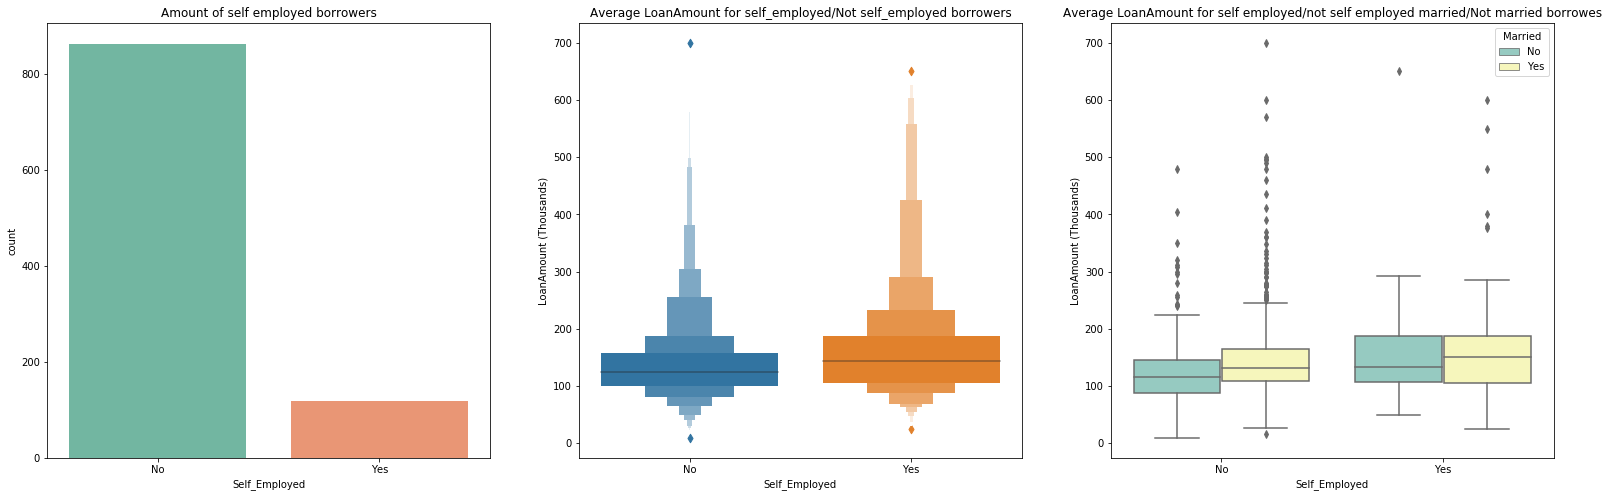

In [13]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(27,8)

cp3 = sns.countplot(x='Self_Employed', data=df, palette='Set2', ax=ax[0])
cp3.set_title('Amount of self employed borrowers')

bp1 = sns.boxenplot(x=df["Self_Employed"], y=df["LoanAmount"], ax=ax[1])
bp1.set_ylabel('LoanAmount (Thousands)')
bp1.set_title('Average LoanAmount for self_employed/Not self_employed borrowers')

bp = sns.boxplot(x='Self_Employed', y='LoanAmount', hue='Married', data=df, palette='Set3')
bp.set_ylabel('LoanAmount (Thousands)')
bp.set_title('Average LoanAmount for self employed/not self employed married/Not married borrowes')

### Most Borrowers are married and not self employed.
### A married individual has a higher probability of taking a loan around 150 thousand dollars than an unmarried individual. In addition, married individuals have a higer loan variance (almost up to 500,000 dollars)

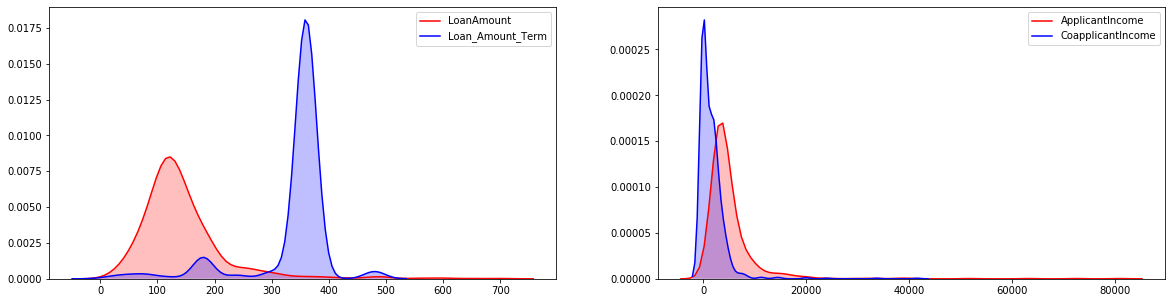

In [14]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20,5)

p1=sns.kdeplot(df['LoanAmount'], shade=True, color="r", ax=ax[0])
p1=sns.kdeplot(df['Loan_Amount_Term'], shade=True, color="b", ax=ax[0])

p2=sns.kdeplot(df['ApplicantIncome'], shade=True, color="r", ax=ax[1])
p2=sns.kdeplot(df['CoapplicantIncome'], shade=True, color="b", ax=ax[1])

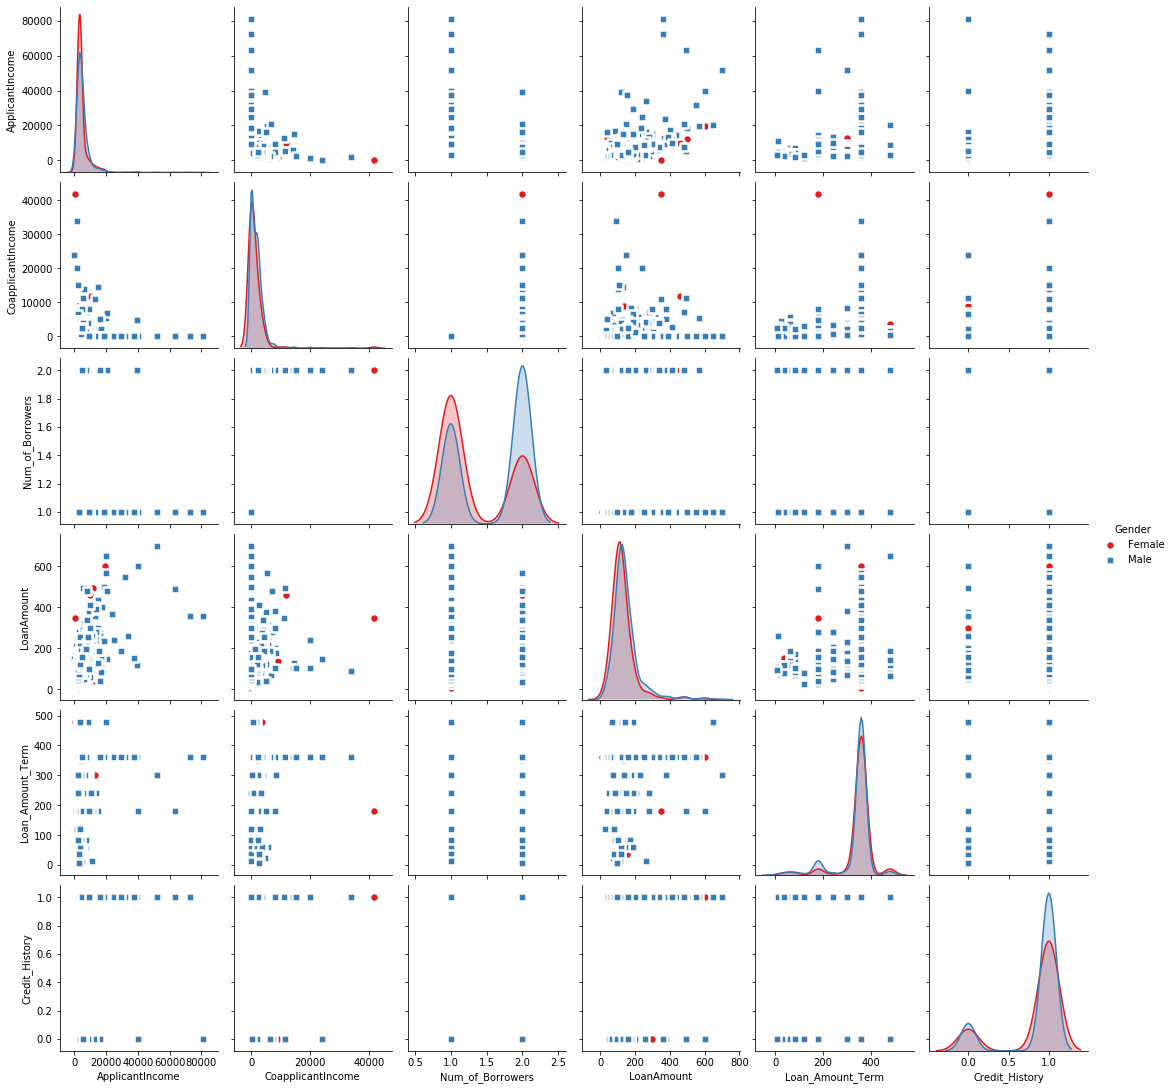

In [15]:
sns.pairplot(df, kind="scatter", hue="Gender", markers=["o", "s"], palette="Set1",plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

Text(0.5, 1.0, 'Number of borrowers who got a loan approval/rejection')

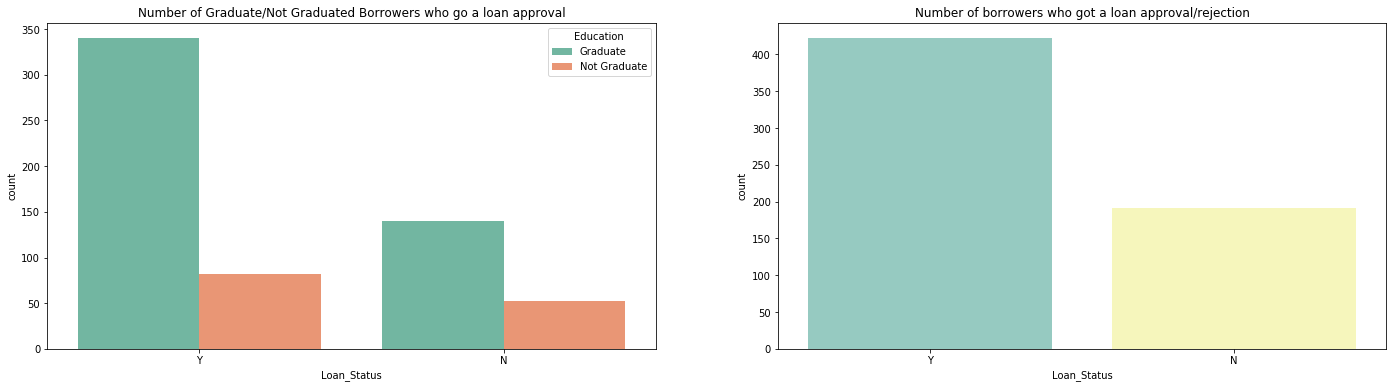

In [10]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(24,6)

cp5 = sns.countplot(x='Loan_Status', hue='Education', data=df_2, palette='Set2', ax=ax[0])
cp5.set_title('Number of Graduate/Not Graduated Borrowers who go a loan approval')

cp6 = sns.countplot(x='Loan_Status', data=df_2, palette='Set3', ax=ax[1])
cp6.set_title('Number of borrowers who got a loan approval/rejection')

Text(0.5, 1.0, 'Amount of Approved/Rejected Loans for each property type')

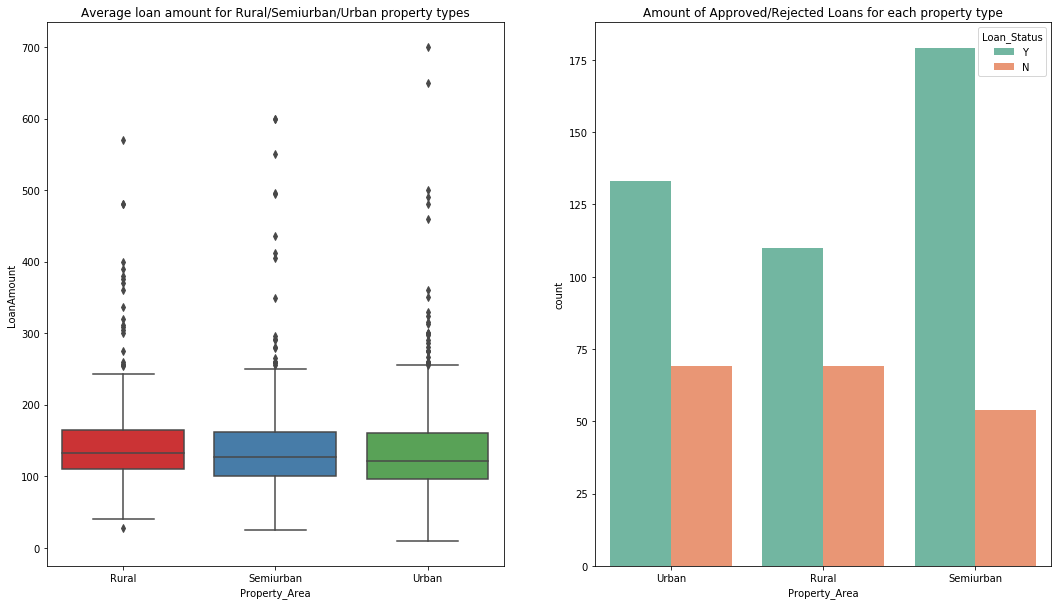

In [17]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18,10)

bp3 = sns.boxplot(x="Property_Area", y="LoanAmount", data=df, palette="Set1", ax=ax[0])
bp3.set_title('Average loan amount for Rural/Semiurban/Urban property types')

cp7 = sns.countplot(x='Property_Area', hue='Loan_Status', data=df_2, palette='Set2', ax=ax[1])
cp7.set_title('Amount of Approved/Rejected Loans for each property type')

### The Urban property type has the biggest probability spread when it comes to loan amount requested by the borrower. This may mean the following:
* Urban property type has a higher property price variation 
* More people prefer Urban property type

### Most people prefer a semiurban type property (235/614). In addition, the loan rejection rate for semiurban property is the lowest while for urban property has the highest. The reasons might be:
* Urban property price might be unstable because it depends on many factors
* Urban property is more expensive than semiurban and rural property as a result borrowers might have insufficient income to pay off the loan